In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import chi2_contingency




In [2]:
# Import Dataframe
url = 'https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/MMAI%205000%20Files/AI-Human-PewData(1).xlsx'
df = pd.read_excel(url, engine='openpyxl')

In [3]:
# Clean and prepare the dataset
predictors = ['F_RACECMB','F_RELIMP','F_METRO', 'F_CREGION', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT', 'F_EDUCCAT2', 'F_RELIG', 'F_PARTY_FINAL', 'F_INC_SDT1','F_INTFREQ','F_VOLSUM','F_PARTYLN_FINAL','F_RELCOM3CAT',]
outcome = 'SMALG2_W99'

c_df = df.iloc[0:10260]
X = c_df[predictors]
y = c_df[outcome]

clean_df = c_df[predictors + [outcome]]

In [4]:
# Check the Null value for the dataframe
clean_df.isnull().sum()

F_RACECMB             0
F_RELIMP              0
F_METRO               0
F_CREGION             0
F_AGECAT              0
F_GENDER              0
F_EDUCCAT             0
F_EDUCCAT2            0
F_RELIG               0
F_PARTY_FINAL         0
F_INC_SDT1            0
F_INTFREQ           173
F_VOLSUM              0
F_PARTYLN_FINAL    6505
F_RELCOM3CAT          0
SMALG2_W99         5107
dtype: int64

In [5]:
# Drop rows where the 'SMALG2_W99' column is NA
clean_df = clean_df.dropna(subset=['SMALG2_W99'])

In [6]:
# Drop rows where the 'F_INTFREQ' column is NA
clean_df = clean_df.dropna(subset=['F_INTFREQ'])

In [7]:
# Create the new column 'party123'
clean_df['F_PARTYLEAN'] = np.where(
    clean_df['F_PARTY_FINAL'].isin(['Independent', 'Something else', 'Refused']),
    clean_df['F_PARTYLN_FINAL'],
    clean_df['F_PARTY_FINAL']
)



In [8]:
clean_df.head(10)

,F_RACECMB,F_RELIMP,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_RELIG,F_PARTY_FINAL,F_INC_SDT1,F_INTFREQ,F_VOLSUM,F_PARTYLN_FINAL,F_RELCOM3CAT,SMALG2_W99,F_PARTYLEAN
1,White,Somewhat important,Non-metropolitan,Midwest,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Several times a day,Yes,NaN,Medium,Bad idea for society,Republican
2,White,Somewhat important,Metropolitan,Northeast,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$100,000 or more",Several times a day,No,NaN,Medium,Good idea for society,Democrat
5,White,Very important,Non-metropolitan,Midwest,65+,A woman,College graduate+,College graduate/some post grad,Protestant,Republican,"$100,000 or more",Several times a week,Yes,NaN,High,Bad idea for society,Republican
6,White,Somewhat important,Metropolitan,South,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",About once a day,Yes,NaN,Medium,Bad idea for society,Republican
8,Asian or Asian-American,Not too important,Metropolitan,West,50-64,A woman,Some College,"Some college, no degree",Protestant,Republican,"$100,000 or more",Almost constantly,Yes,NaN,Medium,Bad idea for society,Republican
10,White,Very important,Metropolitan,Northeast,18-29,A woman,College graduate+,College graduate/some post grad,Protestant,Republican,"$100,000 or more",Almost constantly,Yes,NaN,High,Bad idea for society,Republican
11,White,Not at all important,Metropolitan,South,65+,A woman,Some College,Associate's degree,Nothing in particular,Democrat,Refused,Several times a day,No,NaN,Medium,Bad idea for society,Democrat
13,White,Somewhat important,Metropolitan,South,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$80,000 to less than $90,000",Almost constantly,Yes,NaN,Medium,Good idea for society,Democrat
15,White,Somewhat important,Metropolitan,West,65+,A man,College graduate+,College graduate/some post grad,Roman Catholic,Independent,"$100,000 or more",Several times a day,No,The Democratic Party,Medium,Bad idea for society,The Democratic Party
16,White,Somewhat important,Metropolitan,Northeast,65+,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"Less than $30,000",Several times a day,Yes,NaN,Medium,Bad idea for society,Democrat


In [9]:
# Drop the columns that we already combined together
clean_df = clean_df.drop(columns=['F_PARTY_FINAL', 'F_PARTYLN_FINAL'])

In [10]:
# Replace the value name in the merged column 'F_PARTYLEAN' into the same format
clean_df['F_PARTYLEAN'] = clean_df['F_PARTYLEAN'].replace('The Democratic Party', 'Democrat')
clean_df['F_PARTYLEAN'] = clean_df['F_PARTYLEAN'].replace('The Republican Party', 'Republican')


In [11]:
clean_df.columns

Index(['F_RACECMB', 'F_RELIMP', 'F_METRO', 'F_CREGION', 'F_AGECAT', 'F_GENDER',
       'F_EDUCCAT', 'F_EDUCCAT2', 'F_RELIG', 'F_INC_SDT1', 'F_INTFREQ',
       'F_VOLSUM', 'F_RELCOM3CAT', 'SMALG2_W99', 'F_PARTYLEAN'],
      dtype='object')

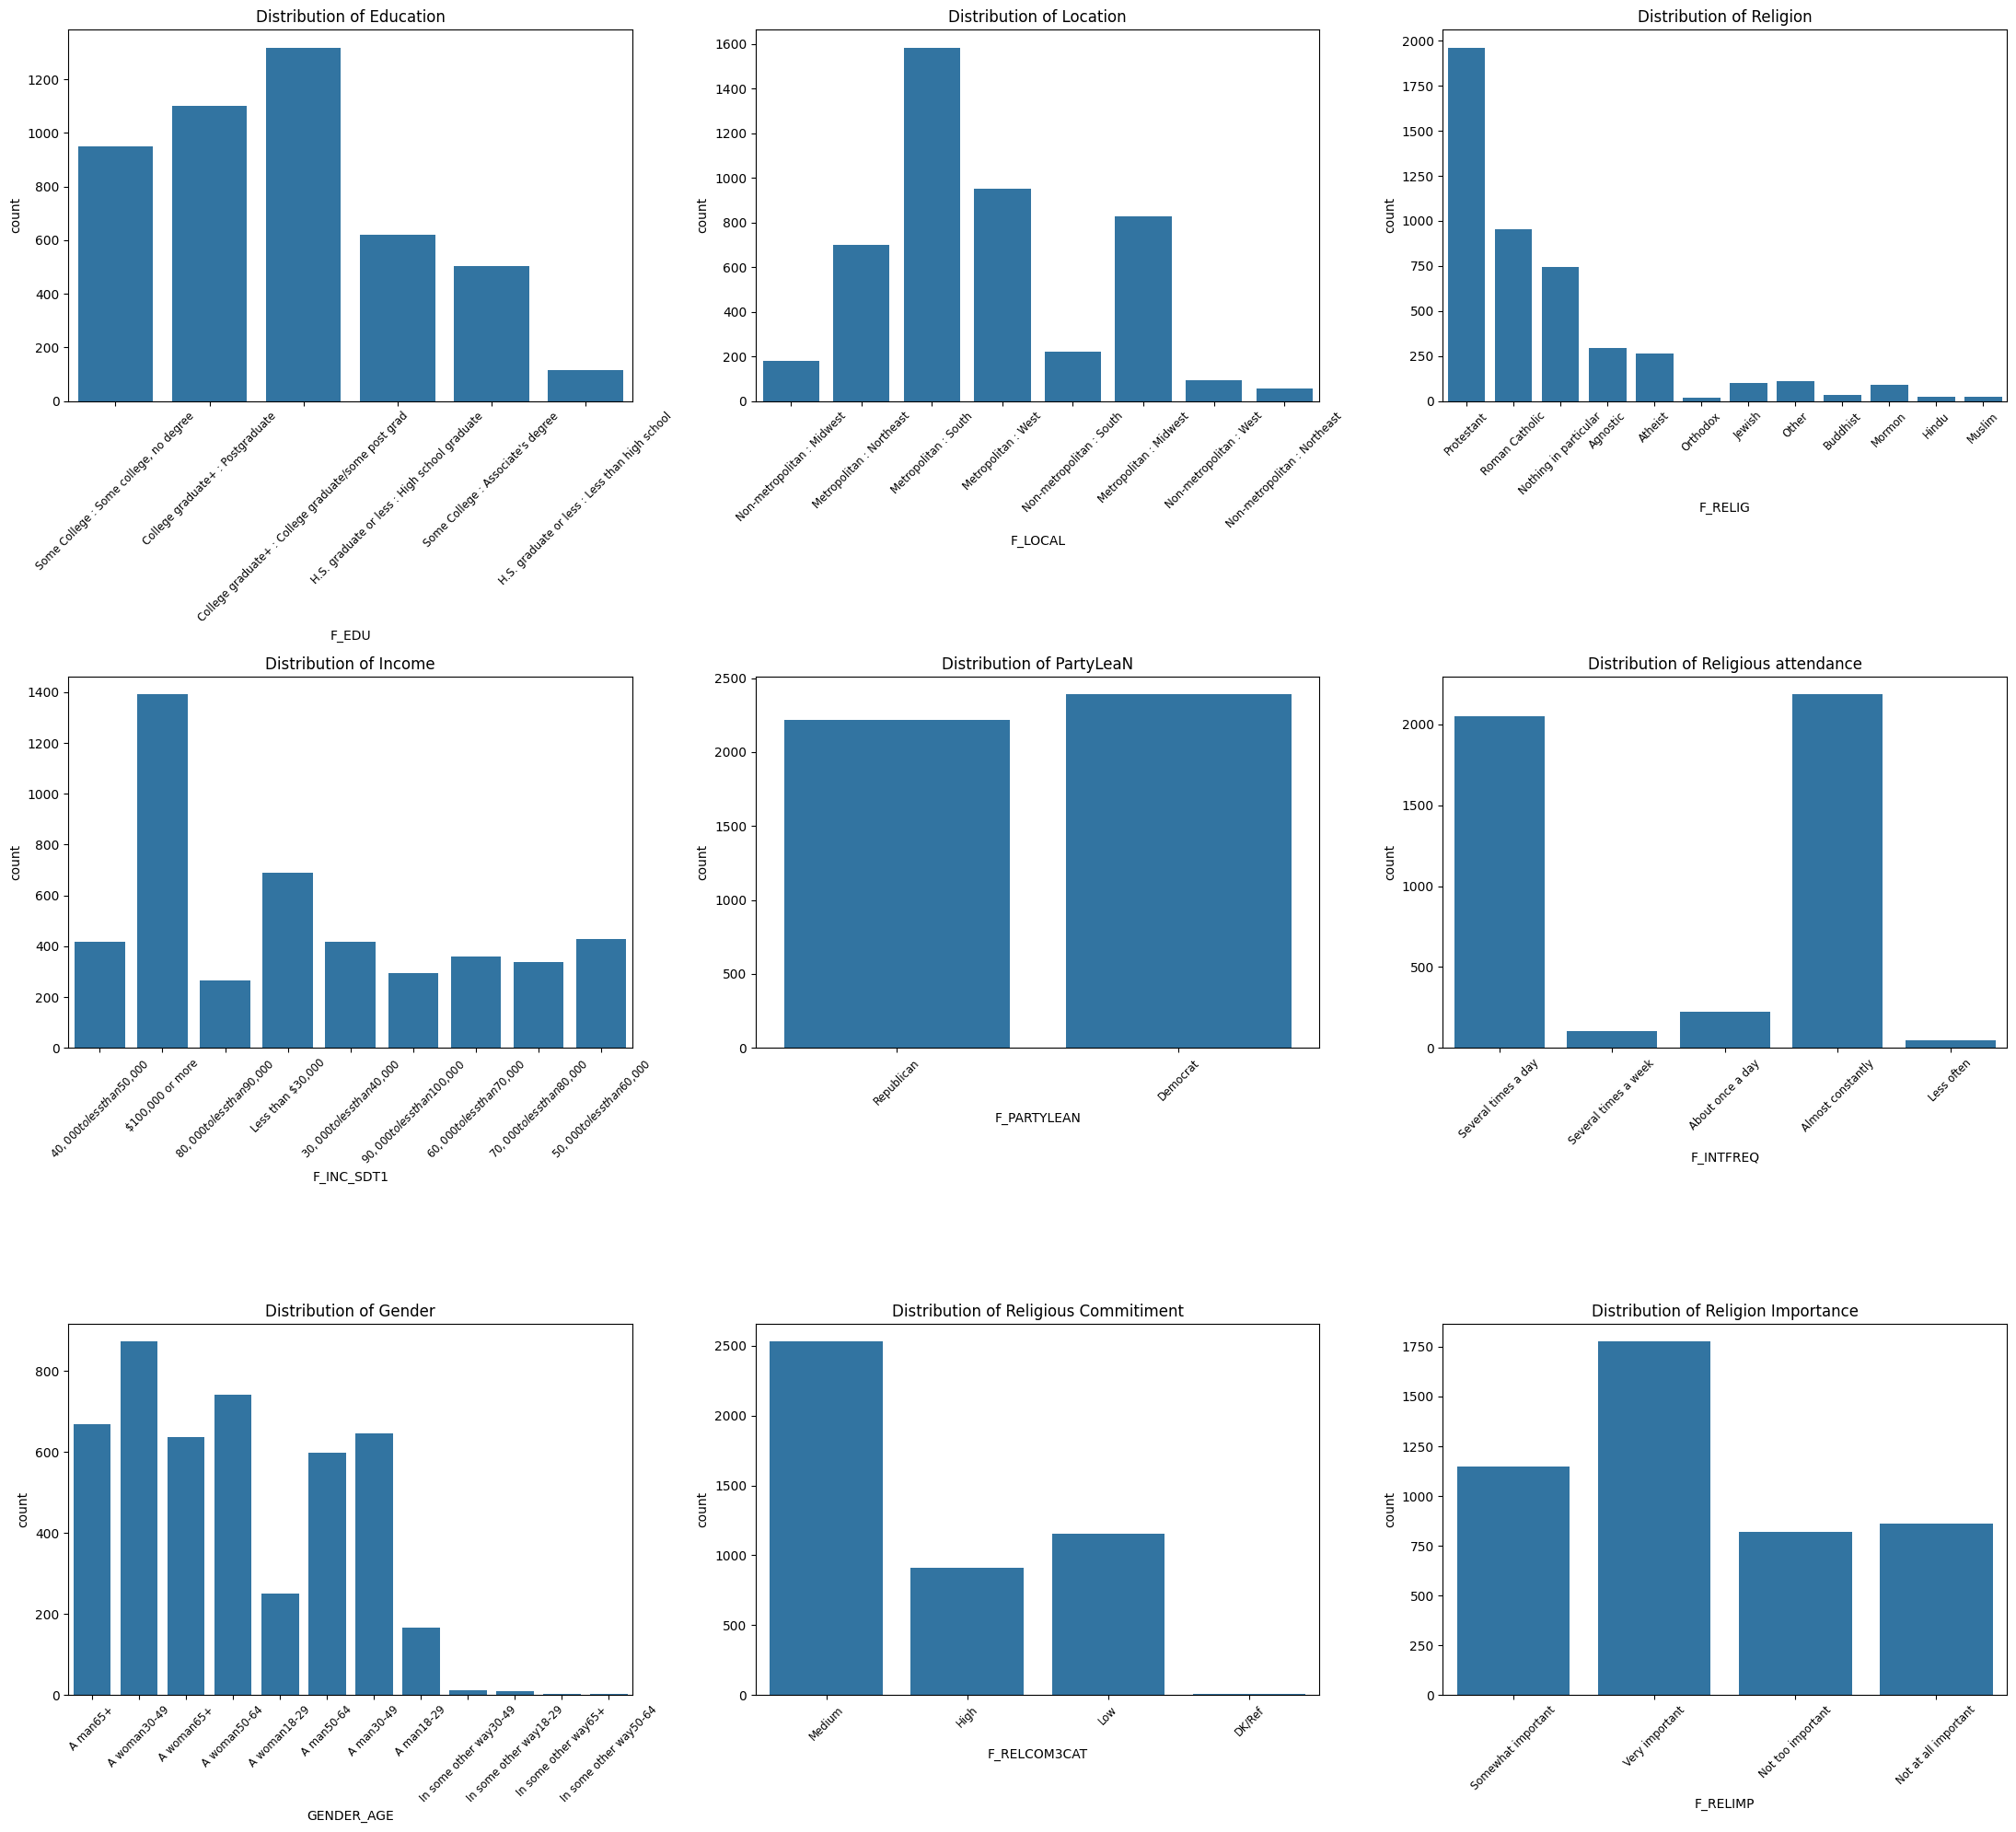

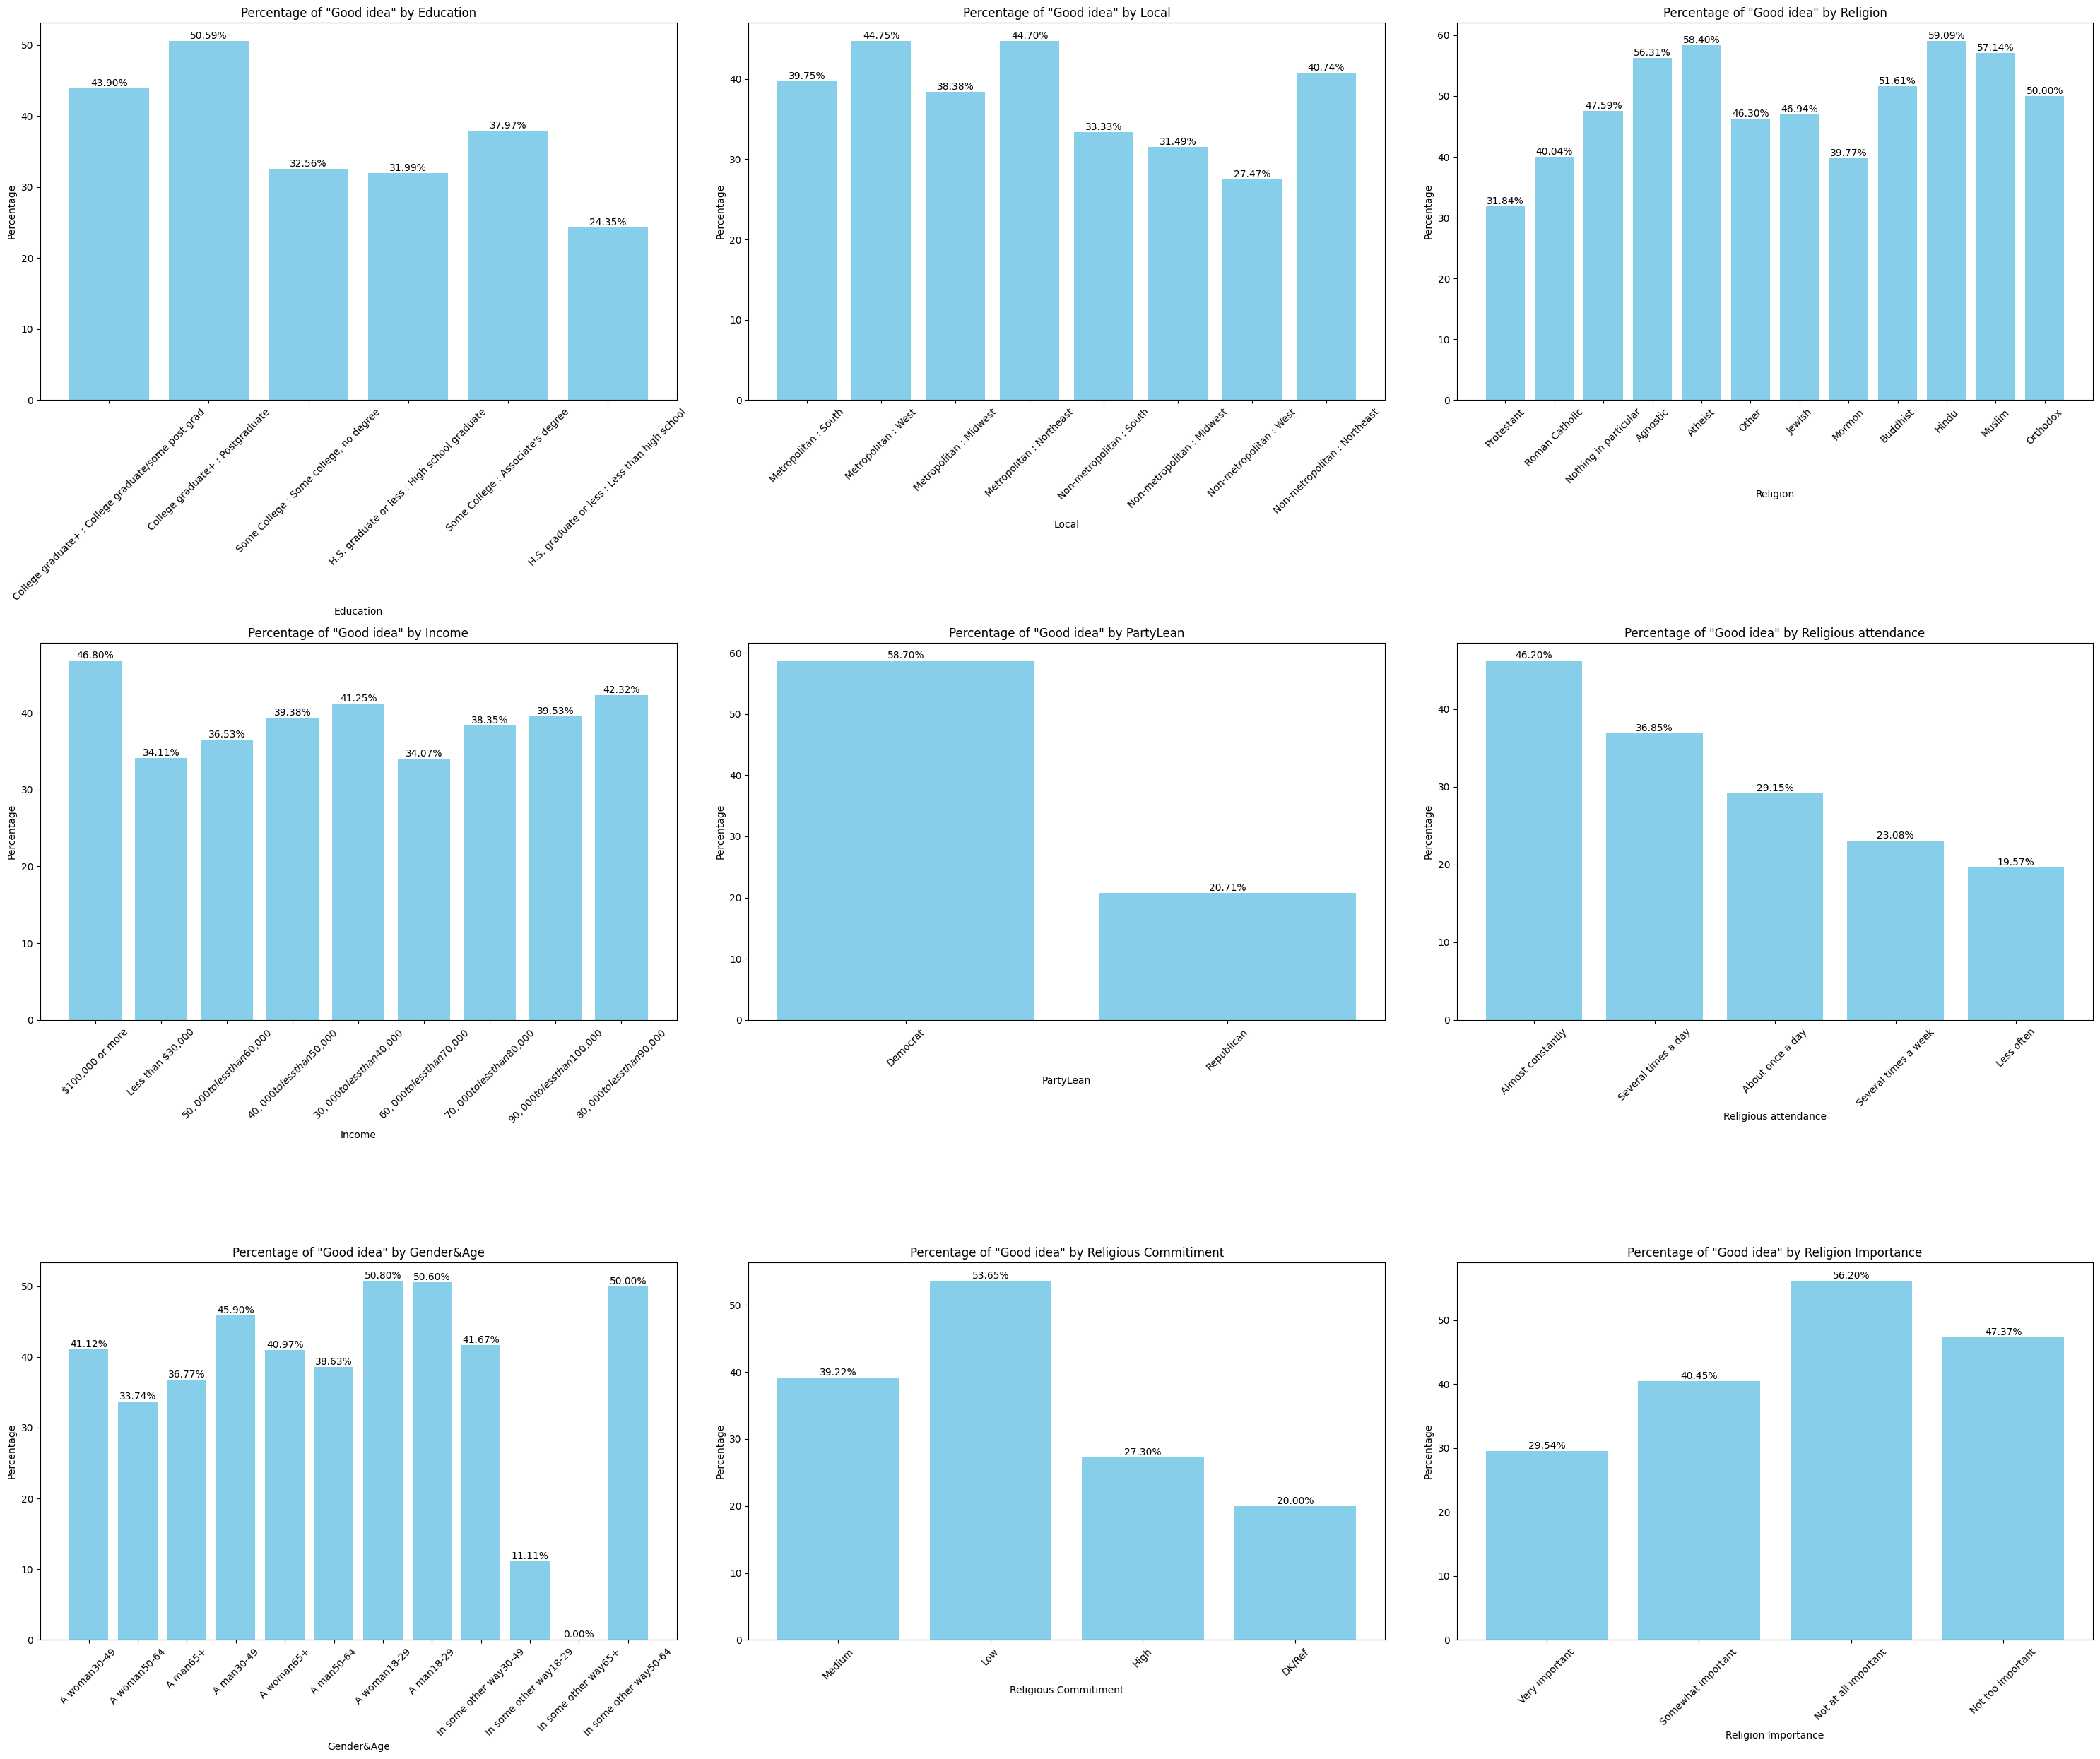

In [12]:
# Drop all left results with 'Refused' answer
clean_df.replace("Refused", pd.NA, inplace=True)
clean_df.dropna(inplace=True)


clean_df['F_RELIG'] = clean_df['F_RELIG'].replace('Mormon (Church of Jesus Christ of Latter-day Saints or LDS)', 'Mormon')
clean_df['F_RELIG'] = clean_df['F_RELIG'].replace('Orthodox (such as Greek, Russian, or some other Orthodox church)', 'Orthodox')

# Merge related columns
clean_df['output'] = clean_df['SMALG2_W99'].apply(lambda x: 1 if x == 'Good idea for society' else 0)
clean_df["F_EDU"] = clean_df['F_EDUCCAT'] + ' : ' + clean_df['F_EDUCCAT2']
clean_df['F_LOCAL'] = clean_df['F_METRO'] + ' : ' + clean_df['F_CREGION']
clean_df['GENDER_AGE'] = clean_df['F_GENDER'] + clean_df['F_AGECAT']



# Visualize categorical features
fig, axes = plt.subplots(3, 3, figsize=(22, 20))
sns.countplot(x='F_EDU', data=clean_df, ax=axes[0, 0]).set_title('Distribution of Education')
sns.countplot(x='F_LOCAL', data=clean_df, ax=axes[0, 1]).set_title('Distribution of Location')
sns.countplot(x='F_RELIG', data=clean_df, ax=axes[0, 2]).set_title('Distribution of Religion')
sns.countplot(x='F_INC_SDT1', data=clean_df, ax=axes[1, 0]).set_title('Distribution of Income')
sns.countplot(x='F_PARTYLEAN', data=clean_df, ax=axes[1, 1]).set_title('Distribution of PartyLeaN')
sns.countplot(x='F_INTFREQ', data=clean_df, ax=axes[1, 2]).set_title('Distribution of Religious attendance')
sns.countplot(x='GENDER_AGE', data=clean_df, ax=axes[2, 0]).set_title('Distribution of Gender')
sns.countplot(x='F_RELCOM3CAT', data=clean_df, ax=axes[2, 1]).set_title('Distribution of Religious Commitiment')
sns.countplot(x='F_RELIMP', data=clean_df, ax=axes[2, 2]).set_title('Distribution of Religion Importance')


for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=45, labelsize='small')

plt.tight_layout()
plt.show()

# Filter the Good idea for society data
good_idea_data = clean_df[clean_df['SMALG2_W99'] == 'Good idea for society']

# Function to plot good idea percentages
def plot_good_idea_percentage(ax, category, title, xlabel, rotation=0):
    counts = clean_df[category].value_counts(normalize=True) * 100
    good_idea_percentages = [
        (len(good_idea_data[good_idea_data[category] == value]) / len(clean_df[clean_df[category] == value])) * 100
        for value in counts.index
    ]
    ax.bar(counts.index, good_idea_percentages, color='skyblue')
    for i, pct in enumerate(good_idea_percentages):
        ax.text(i, pct, f'{pct:.2f}%', ha='center', va='bottom')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentage')
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index, rotation=rotation, fontsize=10)



# Plot good idea percentages
fig, axes = plt.subplots(3, 3, figsize=(30, 25))
plot_good_idea_percentage(axes[0, 0], 'F_EDU', 'Percentage of "Good idea" by Education', 'Education', rotation=45)
plot_good_idea_percentage(axes[0, 1], 'F_LOCAL', 'Percentage of "Good idea" by Local', 'Local', rotation=45)
plot_good_idea_percentage(axes[0, 2], 'F_RELIG', 'Percentage of "Good idea" by Religion', 'Religion', rotation=45)
plot_good_idea_percentage(axes[1, 0], 'F_INC_SDT1', 'Percentage of "Good idea" by Income', 'Income', rotation=45)
plot_good_idea_percentage(axes[1, 1], 'F_PARTYLEAN', 'Percentage of "Good idea" by PartyLean', 'PartyLean', rotation=45)
plot_good_idea_percentage(axes[1, 2], 'F_INTFREQ', 'Percentage of "Good idea" by Religious attendance', 'Religious attendance', rotation=45)
plot_good_idea_percentage(axes[2, 0], 'GENDER_AGE', 'Percentage of "Good idea" by Gender&Age', 'Gender&Age', rotation=45)
plot_good_idea_percentage(axes[2, 1], 'F_RELCOM3CAT', 'Percentage of "Good idea" by Religious Commitiment', 'Religious Commitiment', rotation=45)
plot_good_idea_percentage(axes[2, 2], 'F_RELIMP', 'Percentage of "Good idea" by Religion Importance', 'Religion Importance', rotation=45)





plt.tight_layout()
plt.show()

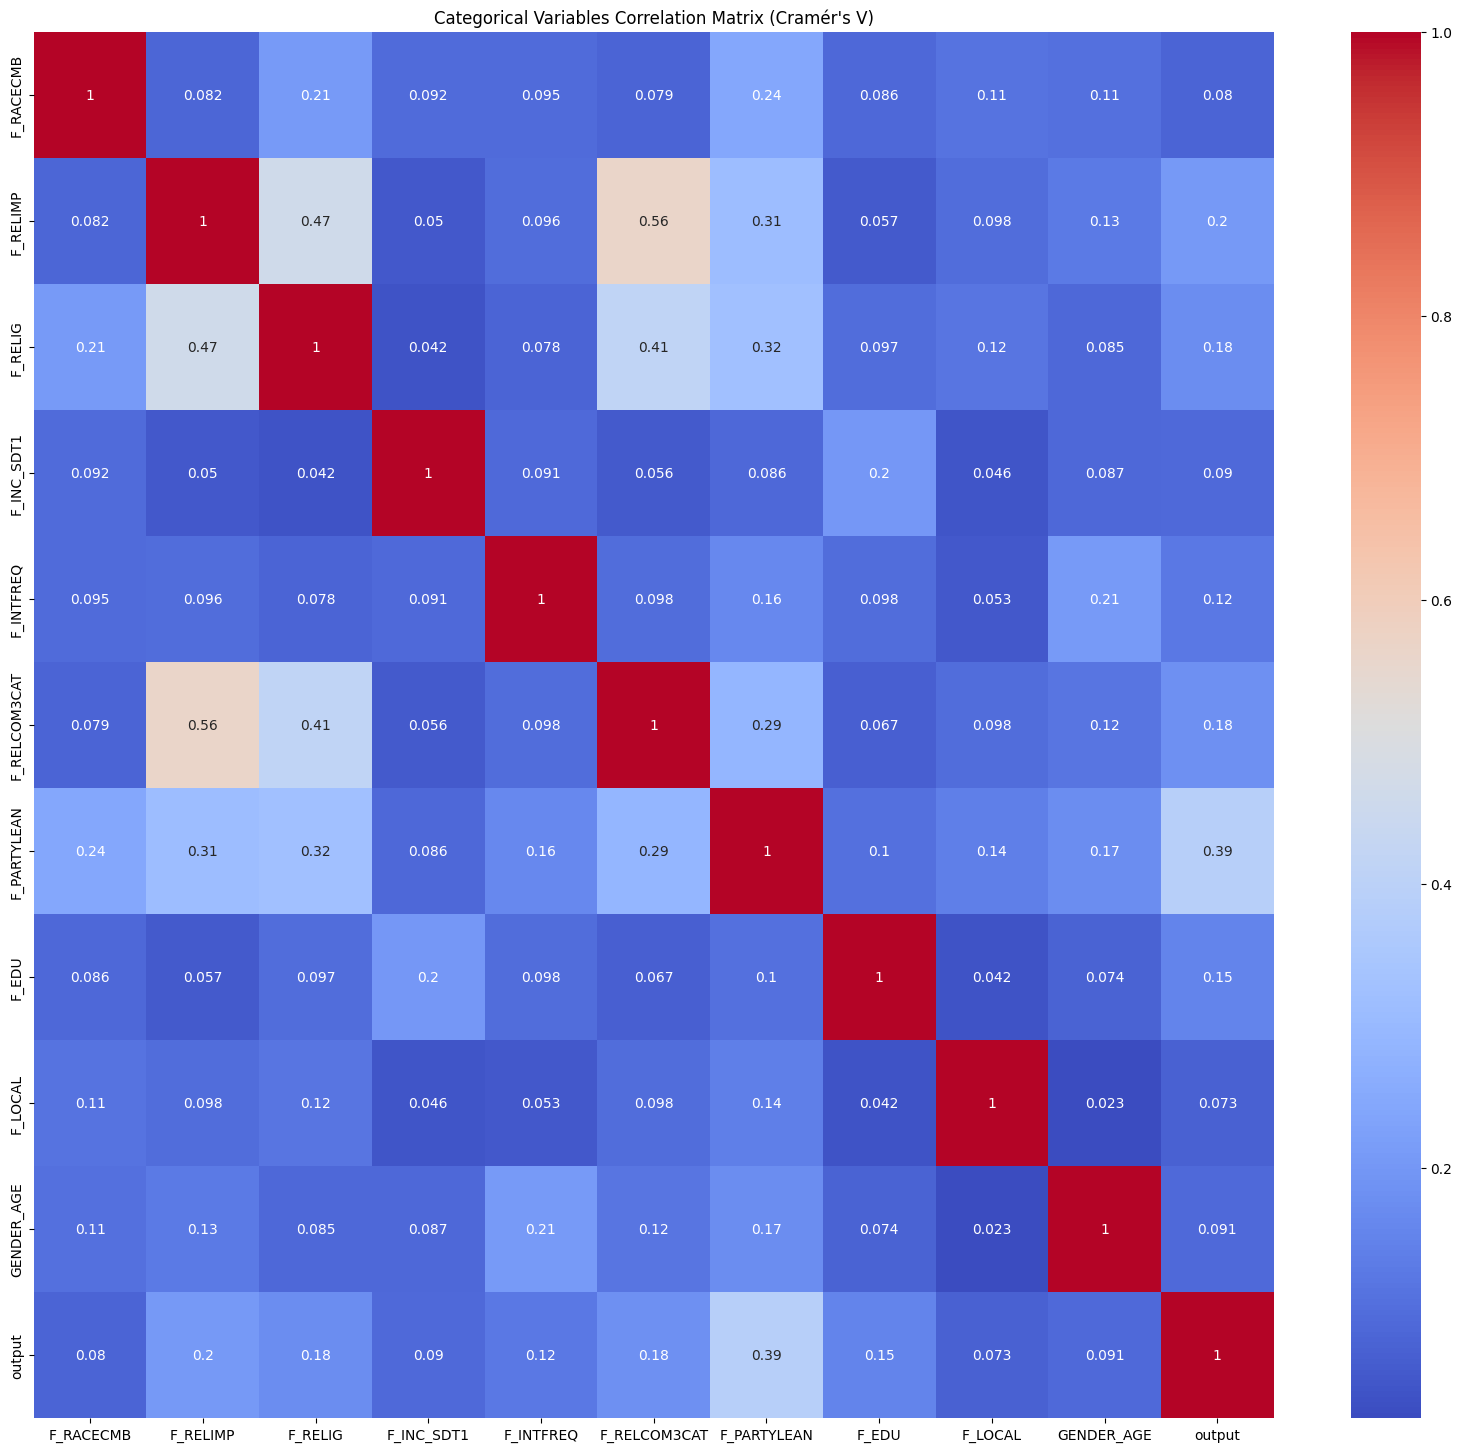

In [13]:
def cramers_v(confusion_matrix):
    """Calculate Cramér's V for the given confusion matrix."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()  # Get total number of observations
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1) if n > 1 else 0)
    rcorr = r - ((r-1)**2)/(n-1) if n > 1 else r
    kcorr = k - ((k-1)**2)/(n-1) if n > 1 else k
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select the categorical variables that you want to analyze
categorical_cols = ['F_RACECMB', 'F_RELIMP', 
         'F_RELIG', 'F_INC_SDT1', 'F_INTFREQ',
       'F_RELCOM3CAT',  'F_PARTYLEAN',
       'F_EDU', 'F_LOCAL', 'GENDER_AGE', 'output']

# Clean data to remove missing values
clean_df = clean_df.dropna(subset=categorical_cols)

# Clean data to remove missing values
corr_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(clean_df[col1], clean_df[col2])
            corr_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Convert the data type to floating-point
corr_matrix = corr_matrix.astype(float)

# Visual correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Categorical Variables Correlation Matrix (Cramér\'s V)')
plt.show()


Logistic Regression F1 Score: 0.6433289563468981
KNN F1 Score: 0.555358672732524
RandomForestClassifier F1 Score: 0.578208918925984
Logistic Regression accuracy Score: 0.7043979706212022
KNN accuracy Score: 0.6422393959058462
RandomForestClassifier accuracy Score: 0.67046892513716
Logistic Regression ROC AUC: 0.7263611437524481
KNN ROC AUC: 0.6727306110458285
RandomForest ROC AUC: 0.7012705640423033
Best Model: Logistic Regression with F1 Score: 0.7043979706212022
Accuracy: 0.7017353579175705
Precision: 0.631578947368421
Recall: 0.6162162162162163
F1 Score: 0.6238030095759234
ROC AUC: 0.7263611437524481


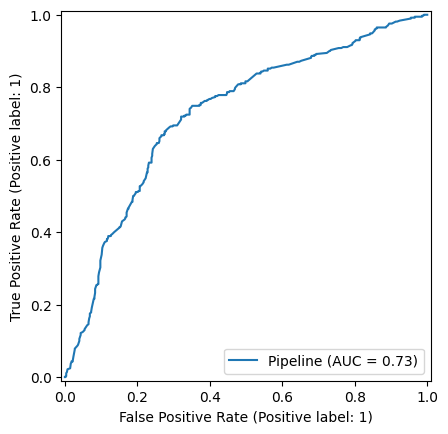

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/pyth

Best Params for Logistic Regression: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Logistic Regression Mean F1 Score: 0.6442091440093243


In [14]:
# Prepare data for modeling
X = clean_df[['F_RELIMP', 'F_RELIG','F_INTFREQ', 'F_PARTYLEAN', 'F_EDU']]
y = clean_df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('pre', OneHotEncoder(handle_unknown='ignore'), [ 'F_RELIMP', 'F_RELIG', 'F_INTFREQ', 'F_PARTYLEAN', 'F_EDU'])
    ])

logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()

logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logreg)])
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn)])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf)])

# Cross-validation scores
logreg_scores = cross_val_score(logreg_pipeline, X_train, y_train, scoring='f1', cv=5)
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, scoring='f1', cv=5)
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, scoring='f1', cv=5)


print(f'Logistic Regression F1 Score: {np.mean(logreg_scores)}')
print(f'KNN F1 Score: {np.mean(knn_scores)}')
print(f'RandomForestClassifier F1 Score: {np.mean(rf_scores)}')


logreg_scores = cross_val_score(logreg_pipeline, X_train, y_train, scoring='accuracy', cv=5)
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, scoring='accuracy', cv=5)
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, scoring='accuracy', cv=5)


print(f'Logistic Regression accuracy Score: {np.mean(logreg_scores)}')
print(f'KNN accuracy Score: {np.mean(knn_scores)}')
print(f'RandomForestClassifier accuracy Score: {np.mean(rf_scores)}')



# Fit the models
logreg_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Predict probabilities for ROC AUC
logreg_pred_proba = logreg_pipeline.predict_proba(X_test)[:, 1]
knn_pred_proba = knn_pipeline.predict_proba(X_test)[:, 1]
rf_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]

print(f'Logistic Regression ROC AUC: {roc_auc_score(y_test, logreg_pred_proba)}')
print(f'KNN ROC AUC: {roc_auc_score(y_test, knn_pred_proba)}')
print(f'RandomForest ROC AUC: {roc_auc_score(y_test, rf_pred_proba)}')




# Select the best model based on highest F1 score
best_model_pipeline = None
best_model_name = ''
best_f1_score = 0

if np.mean(logreg_scores) > best_f1_score:
    best_f1_score = np.mean(logreg_scores)
    best_model_pipeline = logreg_pipeline
    best_model_name = 'Logistic Regression'

if np.mean(knn_scores) > best_f1_score:
    best_f1_score = np.mean(knn_scores)
    best_model_pipeline = knn_pipeline
    best_model_name = 'K-Nearest Neighbors'
    
if np.mean(rf_scores) > best_f1_score:
    best_f1_score = np.mean(rf_scores)
    best_model_pipeline = rf_pipeline
    best_model_name = ' Random Forest Classifier'

print(f'Best Model: {best_model_name} with F1 Score: {best_f1_score}')

# Fit and evaluate the logistic regression model
logreg_pipeline.fit(X_train, y_train)
logreg_pred = logreg_pipeline.predict(X_test)
logreg_pred_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

print(f'Accuracy: {accuracy_score(y_test, logreg_pred)}')
print(f'Precision: {precision_score(y_test, logreg_pred)}')
print(f'Recall: {recall_score(y_test, logreg_pred)}')
print(f'F1 Score: {f1_score(y_test, logreg_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, logreg_pred_proba)}')

# Plot ROC Curve
RocCurveDisplay.from_estimator(logreg_pipeline, X_test, y_test)
plt.show()



# Hyperparameter tuning for logistic regression
param_grid = [
    {'classifier__penalty': ['l1', 'l2'],
     'classifier__C': [0.01, 0.1, 1, 10, 100],
     'classifier__solver': ['liblinear']},

    {'classifier__penalty': ['l2'],
     'classifier__C': [0.01, 0.1, 1, 10, 100],
     'classifier__solver': ['lbfgs', 'sag']},

    {'classifier__penalty': ['elasticnet'],
     'classifier__C': [0.01, 0.1, 1, 10, 100],
     'classifier__solver': ['saga'],
     'classifier__l1_ratio': [0.5, 0.7, 0.9]},

    {'classifier__penalty': [None],
     'classifier__C': [0.01, 0.1, 1, 10, 100],
     'classifier__solver': ['lbfgs']}
]

grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

print(f'Best Params for Logistic Regression: {grid_search_logreg.best_params_}')
logreg_best = grid_search_logreg.best_estimator_

print(f'Logistic Regression Mean F1 Score: {np.mean(grid_search_logreg.cv_results_["mean_test_score"])}')



Final Accuracy: 0.6898047722342733
Final Precision: 0.5905172413793104
Final Recall: 0.7405405405405405
Final F1 Score: 0.657074340527578
Final ROC AUC: 0.698168820994908


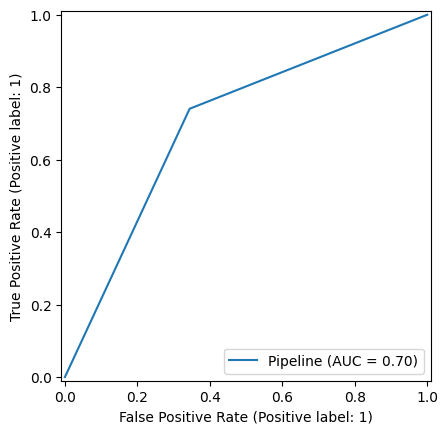

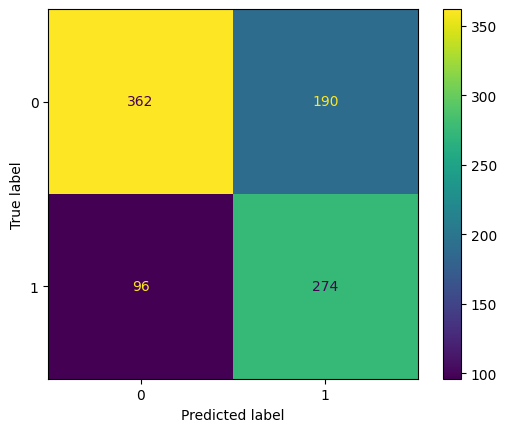

In [22]:
from sklearn.metrics import confusion_matrix

# Fit the best model and predict
log_new = LogisticRegression(C=0.01,max_iter=1000, penalty='l1', solver='liblinear')
logreg_pipeline_new = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', log_new)])
logreg_pipeline_new.fit(X_train, y_train)
y_pred = logreg_pipeline_new.predict(X_test)
y_pred_proba = logreg_pipeline_new.predict_proba(X_test)[:, 1]


print(f'Final Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Final Precision: {precision_score(y_test, y_pred)}')
print(f'Final Recall: {recall_score(y_test, y_pred)}')
print(f'Final F1 Score: {f1_score(y_test, y_pred)}')
print(f'Final ROC AUC: {roc_auc_score(y_test, y_pred_proba)}')

# Plot ROC Curve
RocCurveDisplay.from_estimator(logreg_pipeline_new, X_test, y_test)
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


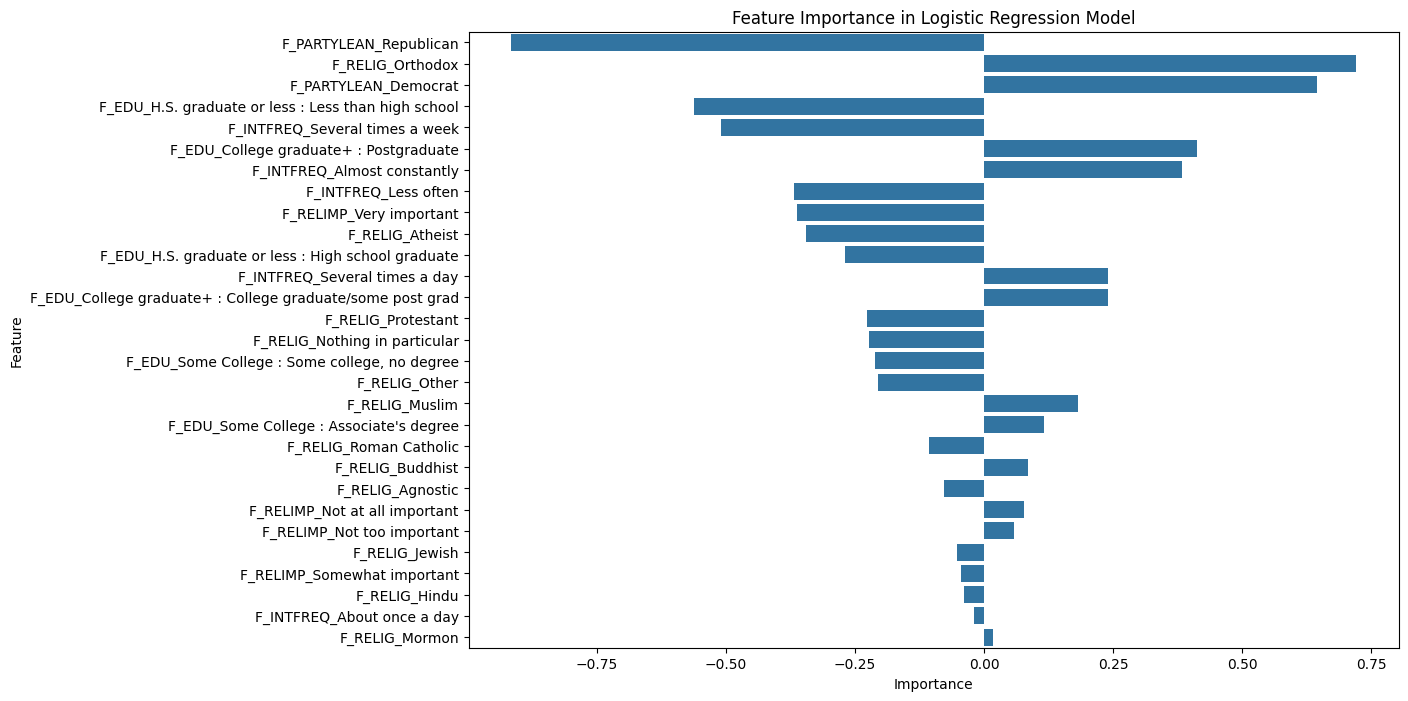

In [16]:
# Get feature names after one-hot encoding
encoded_features = logreg_pipeline.named_steps['preprocessor'].named_transformers_['pre'].get_feature_names_out()

# Extract feature importance (coefficients) from the logistic regression model
feature_importance = logreg_pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': encoded_features, 'Importance': feature_importance})

# Sort by absolute value of importance
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)

# Display feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Logistic Regression Model')
plt.show()


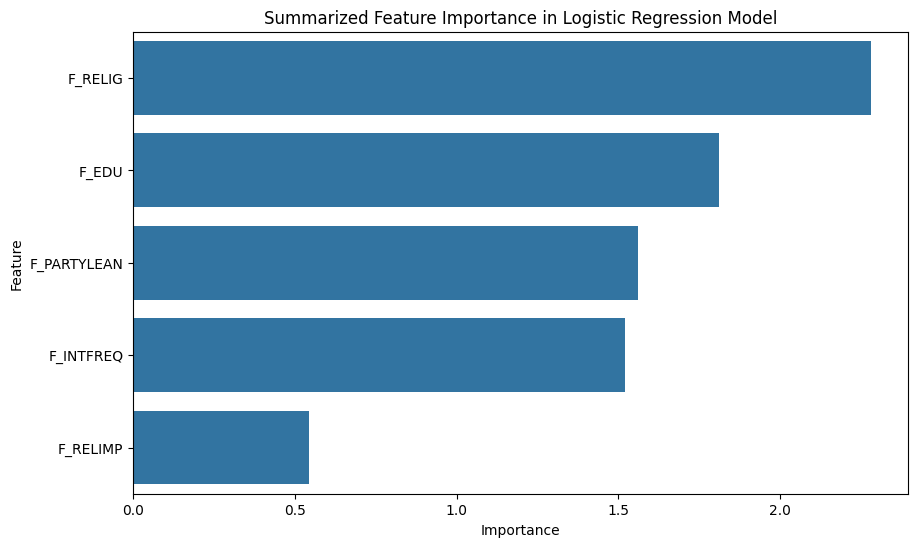

In [17]:
# Get feature names after one-hot encoding
encoded_features = logreg_pipeline.named_steps['preprocessor'].named_transformers_['pre'].get_feature_names_out()

# Extract feature importance (coefficients) from the logistic regression model
feature_importance = logreg_pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': encoded_features, 'Importance': feature_importance})

# Mapping original column names to encoded feature names
original_columns = [ 'F_EDU', 'F_RELIG','F_INTFREQ','F_PARTYLEAN','F_RELIMP']
mapped_features = {col: [] for col in original_columns}

for feature in importance_df['Feature']:
    for col in original_columns:
        if feature.startswith(col):
            mapped_features[col].append(feature)

# Summarize feature importance by original columns
summary_importance = {col: 0 for col in original_columns}
for col, features in mapped_features.items():
    summary_importance[col] = importance_df[importance_df['Feature'].isin(features)]['Importance'].abs().sum()

# Create a DataFrame for summarized feature importance
summary_df = pd.DataFrame({'Feature': list(summary_importance.keys()), 'Importance': list(summary_importance.values())})

# Sort by absolute value of importance
summary_df = summary_df.sort_values(by='Importance', ascending=False)

# Display summarized feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=summary_df)
plt.title('Summarized Feature Importance in Logistic Regression Model')
plt.show()


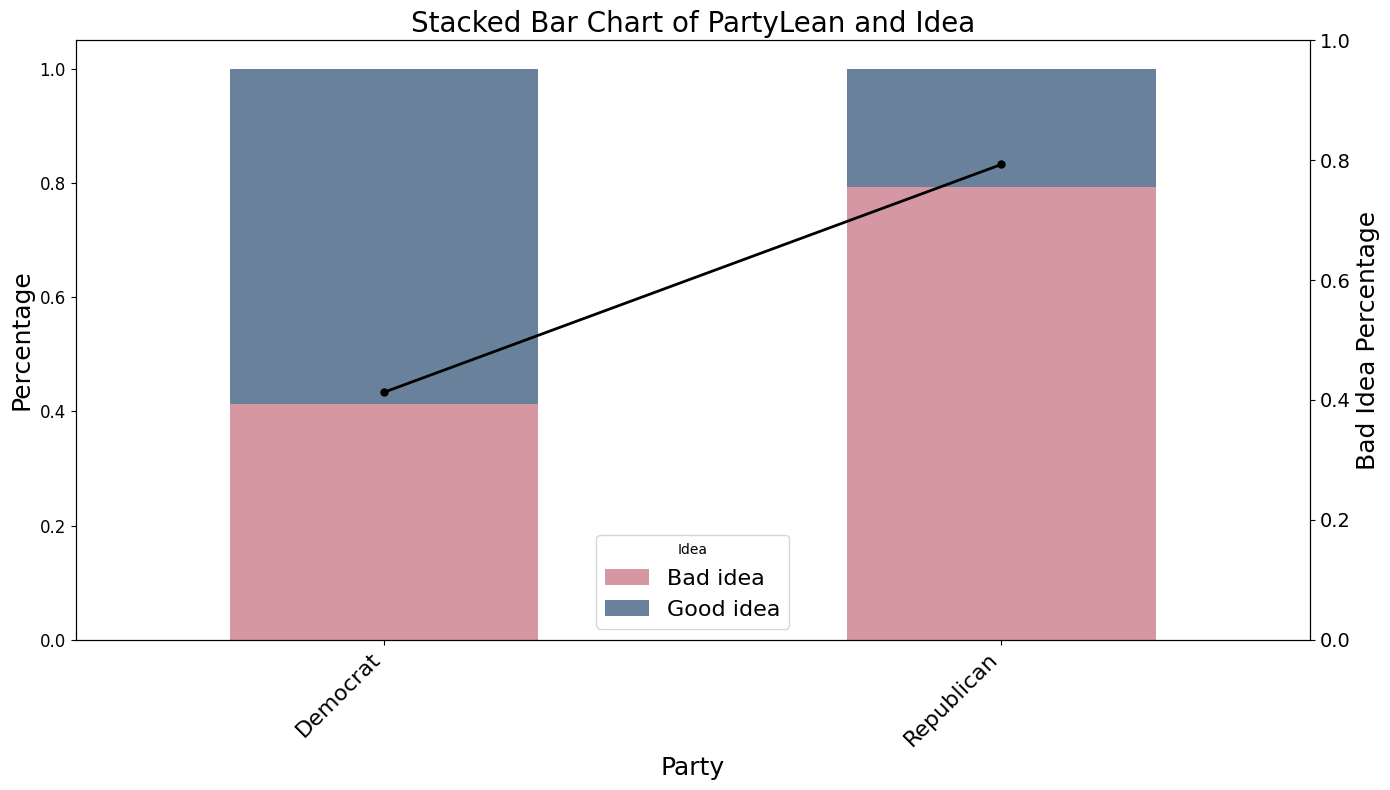

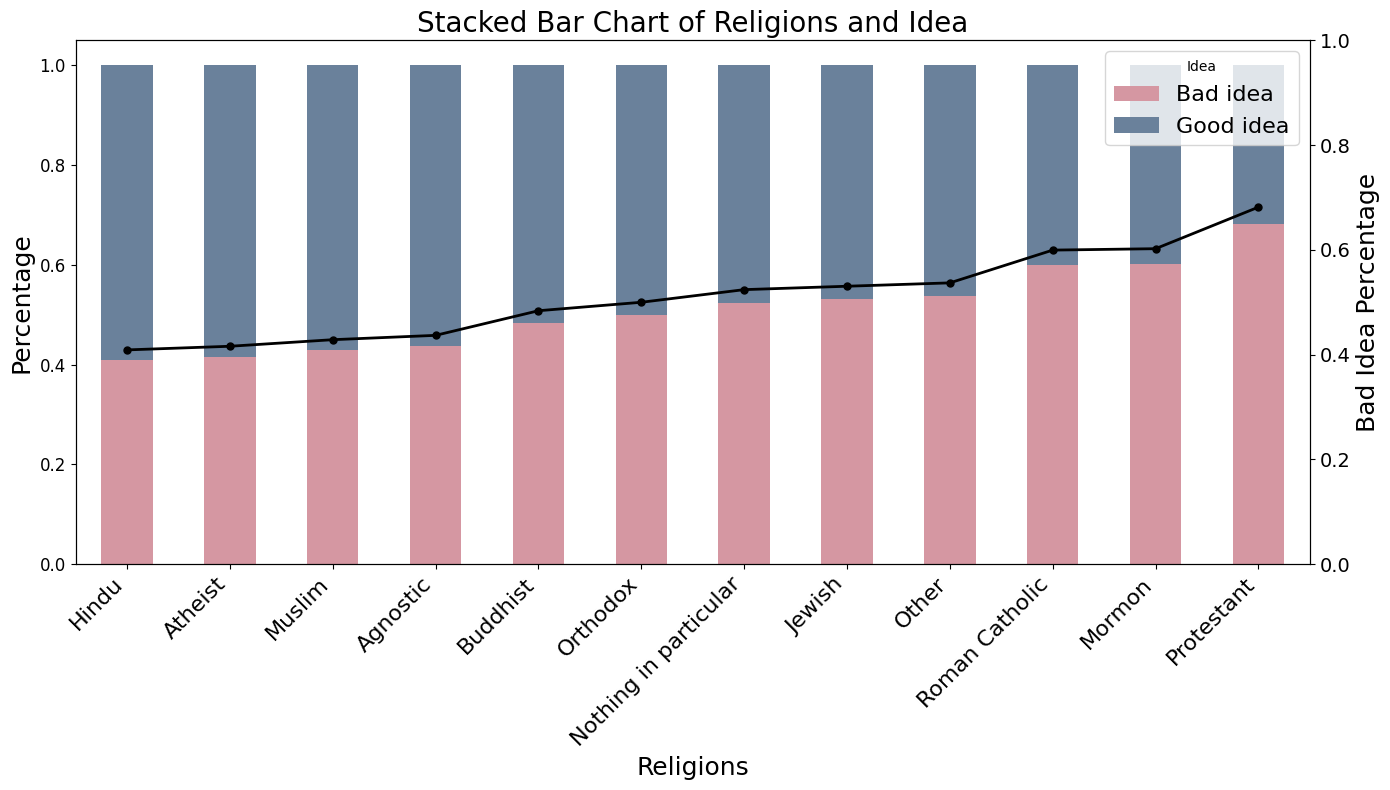

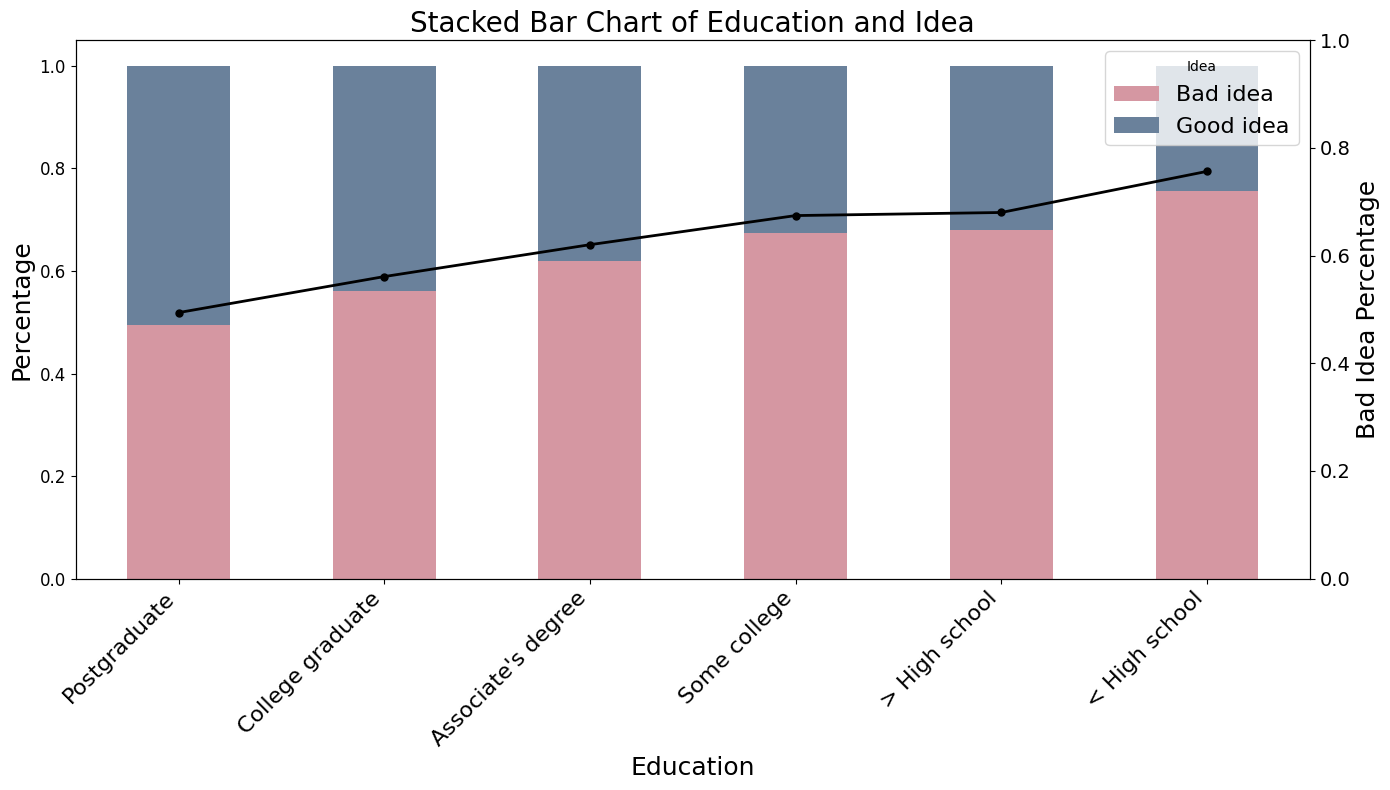

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean data to remove missing values
clean_df = clean_df.dropna(subset=['F_RELIG', 'F_EDU', 'F_PARTYLEAN', 'SMALG2_W99'])

# Clean data to remove missing values
clean_df['Idea'] = clean_df['SMALG2_W99'].apply(lambda x: 'Good idea' if x == 'Good idea for society' else 'Bad idea')



clean_df['F_EDU'] = clean_df['F_EDU'].replace('Some College : Some college, no degree','Some college')
clean_df['F_EDU'] = clean_df['F_EDU'].replace('College graduate+ : Postgraduate','Postgraduate')
clean_df['F_EDU'] = clean_df['F_EDU'].replace('College graduate+ : College graduate/some post grad','College graduate')
clean_df['F_EDU'] = clean_df['F_EDU'].replace('H.S. graduate or less : High school graduate','> High school')
clean_df['F_EDU'] = clean_df['F_EDU'].replace("Some College : Associate's degree","Associate's degree")
clean_df['F_EDU'] = clean_df['F_EDU'].replace('H.S. graduate or less : Less than high school','< High school')



# Create a new column for Good idea and Bad idea
def plot_stacked_bar_chart(x, title, xlabel, ylabel):
    # Count the count of Good and Bad ideas in each category
    idea_counts = clean_df.groupby([x, 'Idea']).size().unstack().fillna(0)
    
    # Calculate the total for each category
    total_counts = idea_counts.sum(axis=1)
    
    # Calculate the proportion of Good and Bad ideas in each category
    idea_percentage = idea_counts.div(total_counts, axis=0)
    
    # Sort in order of the proportion of Bad ideas
    idea_percentage = idea_percentage.sort_values(by='Bad idea')
    
    # Draw a stacked bar chart
    ax = idea_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#D597A2', '#6A819B'])  
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=12)
    plt.legend(title='Idea', fontsize=16)
    
    # Add a curve to describe the proportion of bad ideas
    bad_idea_percentage = idea_percentage['Bad idea'].values
    ax2 = ax.twinx()
    ax2.plot(range(len(bad_idea_percentage)), bad_idea_percentage, color='black', marker='o', linestyle='-', linewidth=2, markersize=5)
    ax2.set_ylim(0, 1)
    ax2.set_ylabel('Bad Idea Percentage', fontsize=18)
    plt.yticks(fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Draw a stacked bar chart for F_PARTYLN_FINAL
plot_stacked_bar_chart('F_PARTYLEAN', 'Stacked Bar Chart of PartyLean and Idea', 'Party', 'Percentage')

# Draw a stacked bar chart for F_RELCOM3CAT
plot_stacked_bar_chart('F_RELIG', 'Stacked Bar Chart of Religions and Idea', 'Religions', 'Percentage')

# Draw a stacked bar chart for F_EDU
plot_stacked_bar_chart('F_EDU', 'Stacked Bar Chart of Education and Idea', 'Education', 'Percentage')

